# Linear and Ridge Regression Models

In [1]:
# seed value for random number generators to obtain reproducible results
RANDOM_SEED = 1

In [2]:
# Expect fitted values to be close to zero
SET_FIT_INTERCEPT = True

In [3]:
# import base packages into the namespace for this program
import numpy as np
import pandas as pd
import os

In [4]:
# modeling routines from Scikit Learn packages
import sklearn.linear_model 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split
from math import sqrt  # for root mean-squared error calculation
import matplotlib # import matplotlib
import matplotlib.pyplot as plt  # static plotting
import seaborn as sns  # pretty plotting, including heat map
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler # for standardization
from sklearn.model_selection import KFold, GridSearchCV, train_test_split  # cross-validation / feature tuning
from sklearn.model_selection import cross_val_predict # Cross-validation
from sklearn.metrics import confusion_matrix # confusion matrix

In [5]:
#check directory
os.getcwd()

'C:\\Users\\ashle\\Documents\\Personal Data\\Northwestern\\2019-04  fall MSDS498_Sec56 Capstone\\Git_repo\\Predictive_models'

In [6]:
#change directory
os.chdir('/Users/rsilvestre/Documents/MAIN 2017_2018/NU PA2/MSDS 498')

In [6]:
# read data for the Boston Housing Study
# creating data frame restdata
ecommerce_input = pd.read_csv('Final_cleaned102419.csv')  

In [19]:
# correlation heat map setup for seaborn
def corr_chart(df_corr, file_nm='plot-corr-map.pdf'):
    corr=df_corr.corr()
    #screen top half to get a triangle
    top = np.zeros_like(corr, dtype=np.bool)
    top[np.triu_indices_from(top)] = True
    fig=plt.figure()
    fig, ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr, mask=top, cmap='coolwarm', 
        center = 0, square=True, 
        linewidths=.5, cbar_kws={'shrink':.5}, 
        annot = True, annot_kws={'size': 9}, fmt = '.3f')           
    plt.xticks(rotation=45) # rotate variable labels on columns (x axis)
    plt.yticks(rotation=0) # use horizontal variable labels on rows (y axis)
    plt.title('Correlation Heat Map')   
    plt.savefig(file_nm, 
        bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
        orientation='portrait', papertype=None, format=None, 
        transparent=True, pad_inches=0.25, frameon=None)  
    
    return plt

In [8]:
# check the pandas DataFrame object boston_input
print('\neCommerce DataFrame (first and last five rows):')
print(ecommerce_input.head())
print(ecommerce_input.tail())


eCommerce DataFrame (first and last five rows):
   Unnamed: 0  fulfill_duration  review_score  review_score_binary   price  \
0           0                 8             5                    1   58.90   
1           1                16             4                    1  239.90   
2           2                 8             5                    1  199.00   
3           3                 6             4                    1   12.99   
4           4                25             5                    1  199.90   

   freight_value  product_name_lenght  product_description_lenght  \
0          13.29                   58                         598   
1          19.93                   56                         239   
2          17.87                   59                         695   
3          12.79                   42                         480   
4          18.14                   59                         409   

   product_photos_qty  product_weight_g  ...  order_delivered_carri

In [54]:
print('\nGeneral description of the boston_input DataFrame:')
ecommerce_info = ecommerce_input.info()


General description of the boston_input DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96460 entries, 0 to 96459
Columns: 163 entries, fulfill_duration to order_estimated_delivery_yr
dtypes: float64(7), int64(156)
memory usage: 120.0 MB


In [55]:
print(ecommerce_info)

None


In [10]:
#drop categorical variables
ecommerce_input = ecommerce_input.drop(['Unnamed: 0'],axis='columns')

In [11]:
model_data = ecommerce_input.loc[:, ['fulfill_duration','Cust_st_SP','lat_customer','freight_value','Cust_st_BA','Cust_st_PA','long_customer','Cust_st_CE','order_estimated_delivery_mo']]

In [12]:
print(model_data.describe())

       fulfill_duration    Cust_st_SP  lat_customer  freight_value  \
count      96460.000000  96460.000000  96460.000000   96460.000000   
mean          12.517188      0.419739    -21.203736      20.160788   
std            9.550414      0.493519      5.596090      15.802610   
min            1.000000      0.000000    -33.690246       0.000000   
25%            7.000000      0.000000    -23.589383      13.300000   
50%           10.000000      0.000000    -22.923528      16.360000   
75%           16.000000      1.000000    -20.140617      21.200000   
max          210.000000      1.000000     42.184003     409.680000   

         Cust_st_BA    Cust_st_PA  long_customer    Cust_st_CE  \
count  96460.000000  96460.000000   96460.000000  96460.000000   
mean       0.033755      0.009807     -46.188959      0.013249   
std        0.180599      0.098545       4.050699      0.114340   
min        0.000000      0.000000     -72.668881      0.000000   
25%        0.000000      0.000000     -

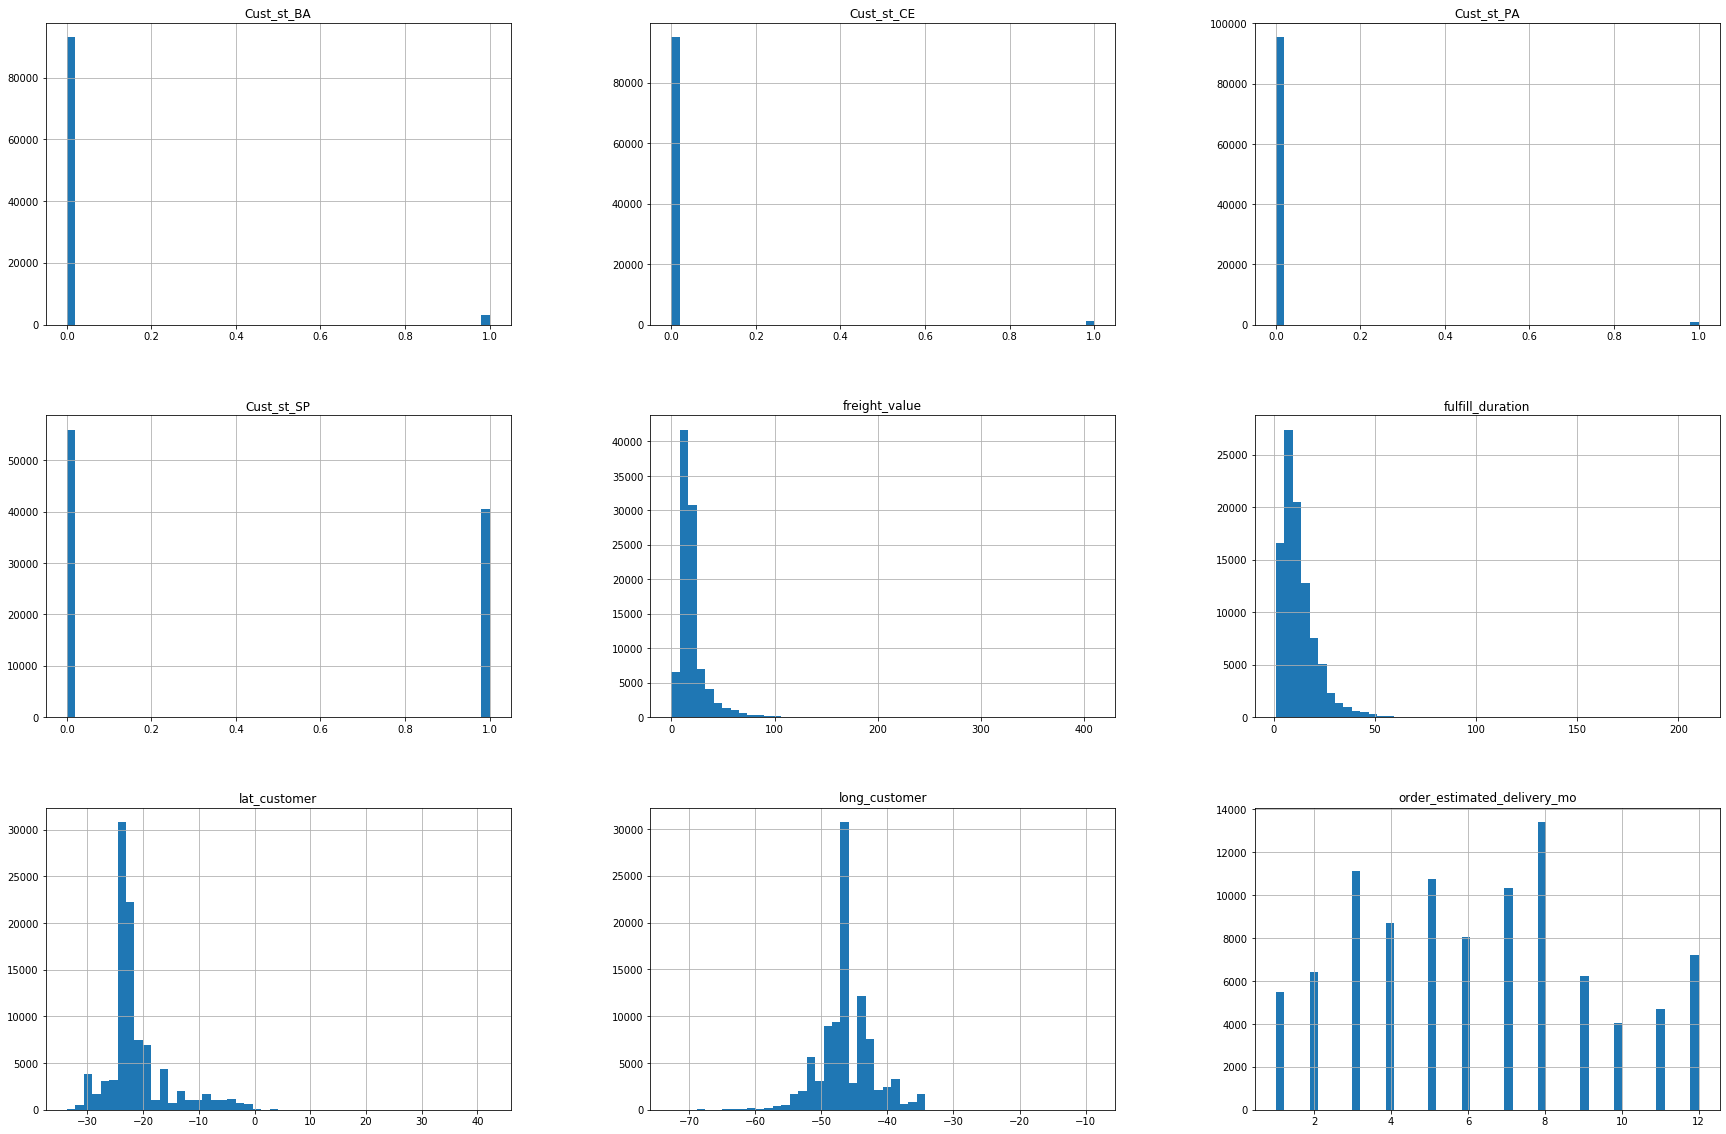

In [13]:
# examine overall distributions of the variables
model_data.hist( bins = 50, figsize = (30, 20)); plt.show()

In [14]:
# suppress warning messages
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn


Histogram of target variable ---------------


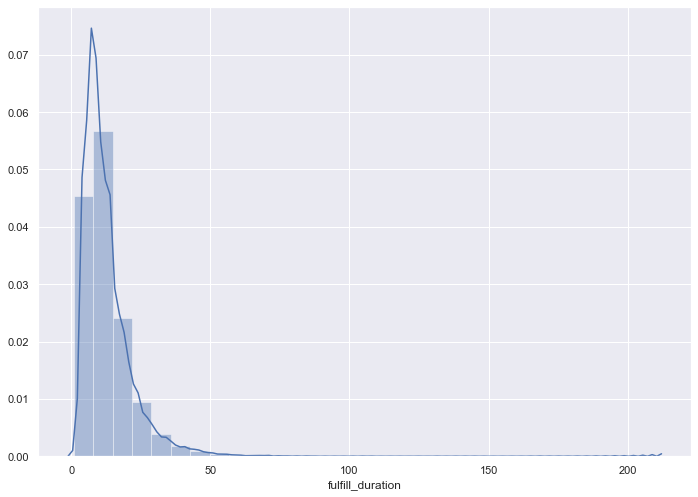

In [15]:
# examine distribution of target variable
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(model_data['fulfill_duration'], bins=30)
print('\nHistogram of target variable ---------------')
plt.show()

<Figure size 842.4x595.44 with 0 Axes>

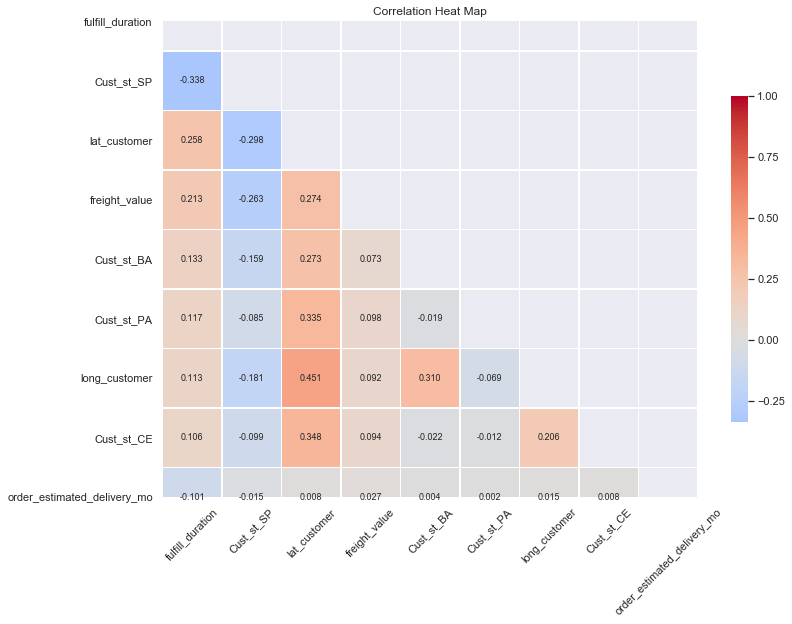

In [21]:
# examine intercorrelations among software preference variables
# with correlation matrix/heat map
corrplt = corr_chart(df_corr = model_data, file_nm='corr_ecommerce102419.pdf') 
# plt.savefig(, 
#     bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
#     orientation='portrait', papertype=None, format=None, 
#     transparent=True, pad_inches=0.25, frameon=None)
corrplt.show()
corrplt.close()

In [22]:
#plot scatterplots
plt.figure(figsize=(20, 5))

<Figure size 1440x360 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

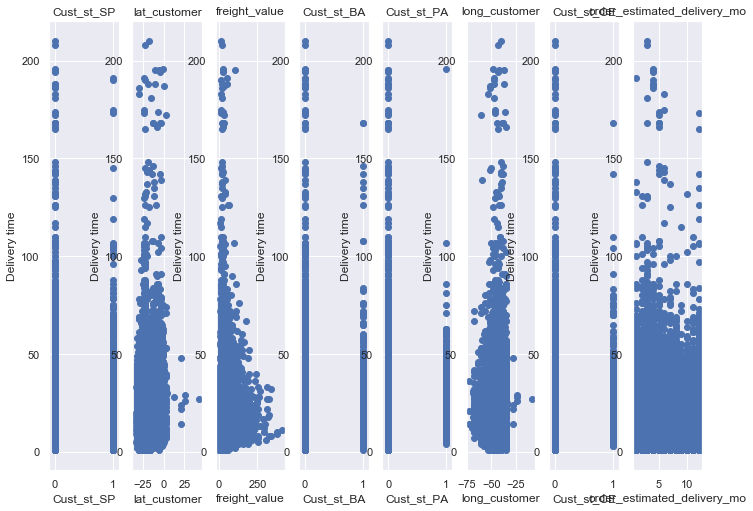

In [23]:
#identify features for the model
features = ['Cust_st_SP', 'lat_customer', 'freight_value', 'Cust_st_BA','Cust_st_PA','long_customer','Cust_st_CE','order_estimated_delivery_mo']
target = model_data['fulfill_duration']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = model_data[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Delivery time')

In [24]:
# create data frame copy for modeling
df_model_data_Scaled = model_data.copy()

In [25]:
# set up preliminary data for data for fitting the models 
# the first column is the median housing value response
# the remaining columns are the explanatory variables
df_model_data_scaled = np.array([model_data.fulfill_duration,\
    model_data.Cust_st_SP,\
    model_data.lat_customer,\
    model_data.freight_value,\
    model_data.Cust_st_BA,\
    model_data.Cust_st_PA,\
    model_data.long_customer,\
    model_data.Cust_st_CE,\
    model_data.order_estimated_delivery_mo]).T

In [26]:
# dimensions of the polynomial model X input and y response
# preliminary data before standardization
print('\nData dimensions:', df_model_data_scaled.shape)


Data dimensions: (96460, 9)


In [27]:
# standard scores for the columns... along axis 0
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(df_model_data_scaled))

StandardScaler(copy=True, with_mean=True, with_std=True)


In [28]:
# show standardization constants being employed
print(scaler.mean_)
print(scaler.scale_)

[ 1.25171885e+01  4.19738752e-01 -2.12037359e+01  2.01607880e+01
  3.37549243e-02  9.80717396e-03 -4.61889591e+01  1.32490151e-02
  6.24804064e+00]
[ 9.55036439  0.49351609  5.59606097 15.80252772  0.1805977   0.09854437
  4.05067822  0.11433931  3.12273867]


In [29]:
# the model data will be standardized form of preliminary model data
model_data2 = scaler.fit_transform(df_model_data_scaled)

In [30]:
# check model data
model_data2

array([[-0.47298598, -0.85050672, -0.09989874, ...,  1.20457022,
        -0.11587454,  0.8812647 ],
       [ 0.36467839,  1.17576966,  0.17523235, ..., -1.16299147,
        -0.11587454, -0.39966221],
       [-0.47298598, -0.85050672,  0.23820759, ...,  0.3938994 ,
        -0.11587454, -1.3603574 ],
       ...,
       [ 1.30705081, -0.85050672, -0.30247561, ...,  0.64469427,
        -0.11587454,  1.20149643],
       [-0.68240207,  1.17576966, -0.42577173, ..., -0.0943653 ,
        -0.11587454,  0.56103297],
       [ 0.25997035,  1.17576966, -0.42790927, ..., -0.08584222,
        -0.11587454, -0.07943048]])

In [31]:
# dimensions of the polynomial model X input and y response
# all in standardized units of measure
print('\nDimensions for model_data:', model_data2.shape)


Dimensions for model_data: (96460, 9)


In [32]:
X = model_data.drop('fulfill_duration', axis = 1)
y = model_data['fulfill_duration']

In [33]:
model_data2 = scaler.fit_transform(X)

# Model Development - 2) Linear Regression

In [34]:
# split the data to Train and Test data
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(model_data2, y, test_size=.30, random_state=0)

In [35]:
# Get model performance criteria
def get_performance(model_name, model, X_test, y_test, y_pred):
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  score = model.score(X_test, y_test)
  
  return mse, rmse, score

In [36]:
# Fit the model
def fit_pred( model, X_train, y_train, X_test):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  plt.scatter(y_test, y_pred); plt.show()
  return y_pred

In [37]:
# Show scores
def display_scores(perf_sum):  
  display('{} Performance Summary'.format(perf_sum['Regressor']))
  display('Score: {:.4}'.format(perf_sum['Score']))
  display('Mean-Squared Error : {:.4}'.format(perf_sum['MSE']))
  display('Root Mean-Squared Error : {:.4}'.format(perf_sum['RMSE']))

In [38]:
perf_cols = ['Regressor', 'Score', 'MSE', 'RMSE']
perf_summary = pd.DataFrame(columns=perf_cols)

In [39]:
lin_reg = LinearRegression(fit_intercept = SET_FIT_INTERCEPT)

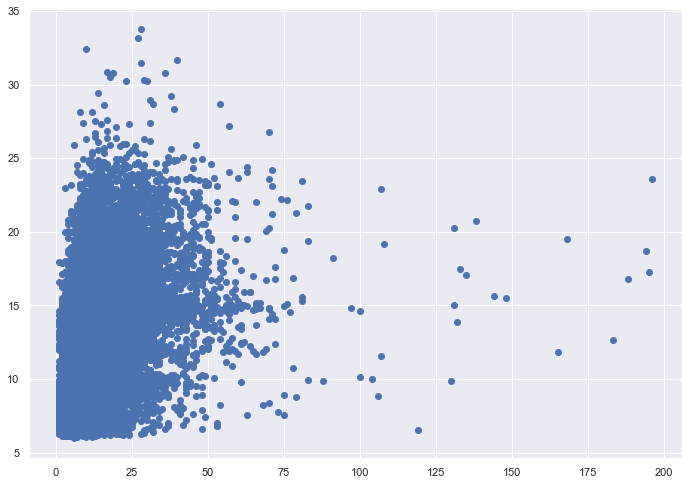

In [40]:
lin_pred = fit_pred(lin_reg, X_train, y_train, X_test)

In [41]:
lm_mse, lm_rmse, lm_score = get_performance('Linear', lin_reg, X_test, y_test, lin_pred)

In [42]:
# Show model performance
lm_perf = pd.DataFrame(['Linear', lm_mse, lm_rmse, lm_score]).T
lm_perf.columns = perf_cols

lm_perf

,Regressor,Score,MSE,RMSE
0,Linear,78.3194,8.84983,0.167329


In [43]:
perf_summary = perf_summary.append(lm_perf)

# Ridge Regression

In [44]:
# Ridge 
ridge_reg = Ridge(alpha = 1, solver = 'cholesky',
                fit_intercept = SET_FIT_INTERCEPT,
                normalize = False,
                random_state = RANDOM_SEED)

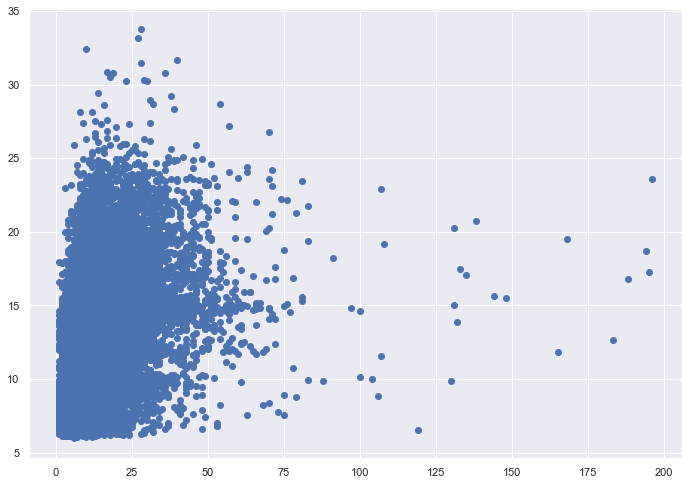

In [45]:
ridge_pred = fit_pred(ridge_reg, X_train, y_train, X_test)

In [46]:
rr_mse, rr_rmse, rr_score = get_performance('Ridge', ridge_reg, X_test, y_test, ridge_pred)

In [47]:
rr_perf = pd.DataFrame(['Ridge', rr_mse, rr_rmse, rr_score]).T
rr_perf.columns = perf_cols

rr_perf

,Regressor,Score,MSE,RMSE
0,Ridge,78.3194,8.84983,0.167329


In [48]:
perf_summary = perf_summary.append(rr_perf)

In [49]:
perf_summary.set_index("Regressor", drop=True, inplace=True)

In [50]:
# compare performance scores between two models
print('\nPeformance Summary Between Models ---------------')
perf_summary.sort_values(by=['RMSE'])


Peformance Summary Between Models ---------------


,Score,MSE,RMSE
Regressor,,,
Ridge,78.3194,8.84983,0.167329
Linear,78.3194,8.84983,0.167329
